# JEST internal workshop &#8594; Intro to ML (Crash Course)

## A Data Science project

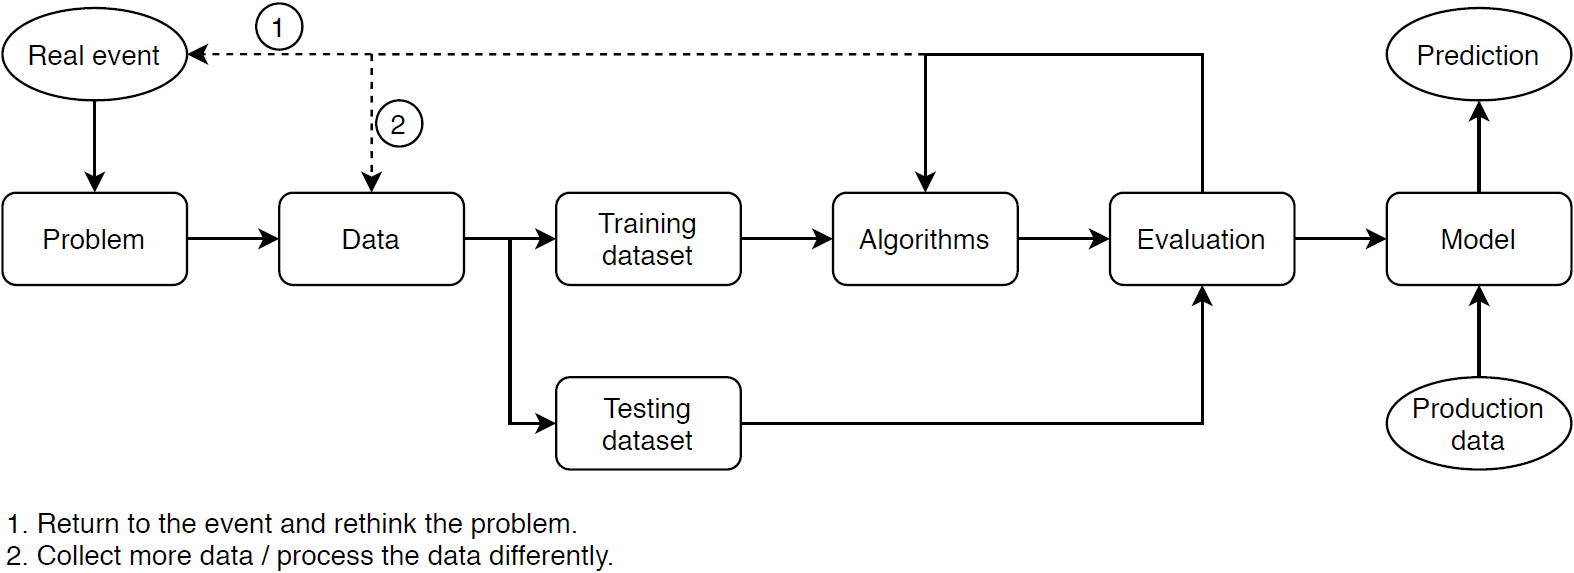

In [2]:
from IPython.display import Image
Image(filename='img/dataScienceProject.png')

by [Tamagusko](https://github.com/tamagusko/), Project Thesis: Artificial Intelligence Applied to Transport Infrastructure Management

---
### Machine Learning Methods

1. Supervised Learning (regression and classification)
2. Unsupervised (dimensionality reduction and clustering)
3. Reinforcement (learn from mistakes)

More details in [What are the types of machine learning?](https://towardsdatascience.com/what-are-the-types-of-machine-learning-e2b9e5d1756f)

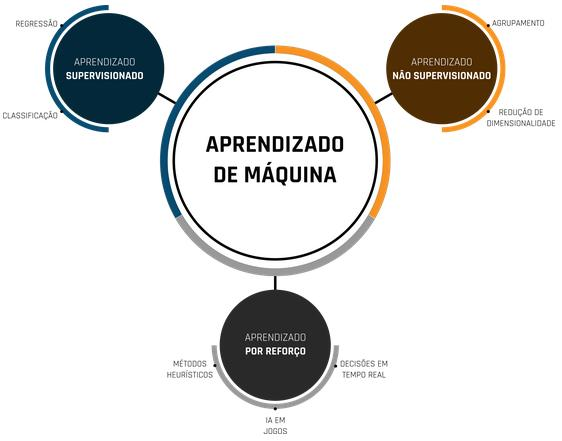

In [8]:
Image(filename='img/ml-ds-algos.jpg', width = 420)

By [Dataat](https://dataat.github.io/introducao-ao-machine-learning/introdu%C3%A7%C3%A3o.html#machine-learning).

## Which model should I choose?

[scikit-learn: Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

##  Is my model good enough?

### Overfitting & Underfitting

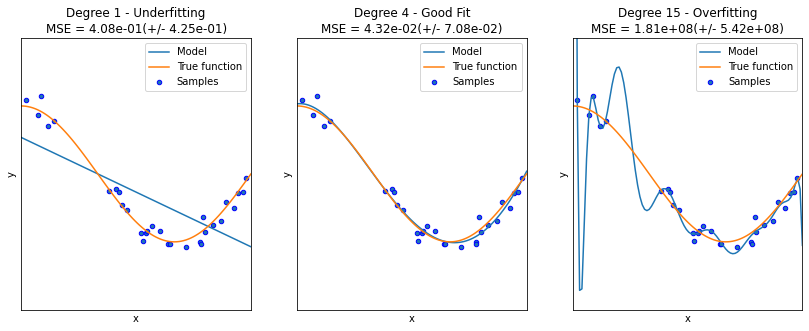

In [1]:
# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]
status = ["Underfitting", "Good Fit", "Overfitting"]

gen_X = np.sort(np.random.rand(n_samples))
gen_y = true_fun(gen_X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(gen_X[:, np.newaxis], gen_y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, gen_X[:, np.newaxis], gen_y, scoring="neg_mean_squared_error", cv=10
)

    gen_X_test = np.linspace(0, 1, 100)
    plt.plot(gen_X_test, pipeline.predict(gen_X_test[:, np.newaxis]), label="Model")
    plt.plot(gen_X_test, true_fun(gen_X_test), label="True function")
    plt.scatter(gen_X, gen_y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degrees[i]} - {status[i]}\nMSE = {-scores.mean():.2e}(+/- {scores.std():.2e})")
plt.show()

### Variance & Bias

\begin{equation}
Error (Model) = Variance + Bias² + Irreducible Error
\end{equation}

More details in: https://scott.fortmann-roe.com/docs/BiasVariance.html

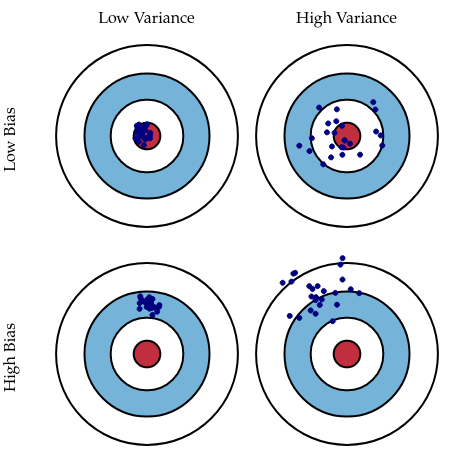

In [4]:
Image(filename='img/bias_variance.png')

In [ ]:
**Q1 checkpoint**

Source: [Scott Fortmann-Roe, 2012](https://scott.fortmann-roe.com/docs/BiasVariance.html)

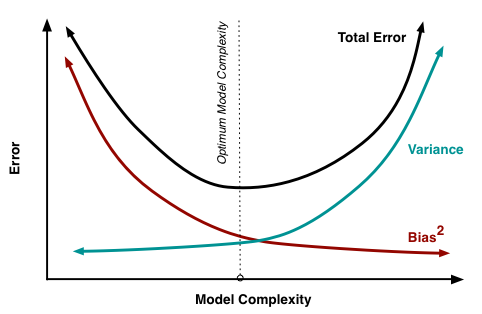

In [5]:
Image(filename='img/modelComplexity.png')

Source: [Scott Fortmann-Roe, 2012](https://scott.fortmann-roe.com/docs/BiasVariance.html)

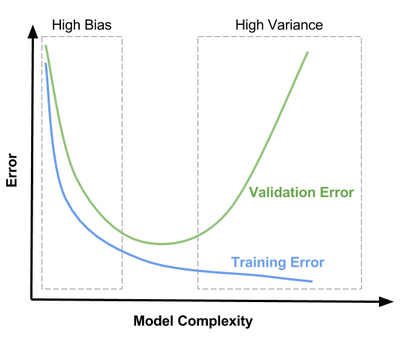

In [6]:
Image(filename='img/ModelComplexity2.png')

Source: [Satya Mallick, 2021](https://learnopencv.com/bias-variance-tradeoff-in-machine-learning/)


### Algorithms